In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ase.io.espresso

In [2]:
H_ensemble_pwo = '/work/westgroup/harris.se/espresso/qe_workflow/results/adsorbate/H/ensemble_60/espresso.pwo'

In [3]:
with open(H_ensemble_pwo, 'r') as f:
    H = list(ase.io.espresso.read_espresso_out(f, index=slice(None)))

In [4]:
H[0].calc.results

{'energy': -13.536405626899247,
 'free_energy': -13.536405626899247,
 'forces': array([[0., 0., 0.]]),
 'stress': array([ 2.75447285e-06,  2.75447285e-06,  2.75447285e-06, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00])}

In [5]:
# Read in the 2000 entries

In [21]:
BEEF_start = 'BEEFens 2000 ensemble energies'
energies = []
with open(H_ensemble_pwo, 'r') as f:
    ensemble_section = False
    for line in f:
        if ensemble_section:
            if line.strip() == '':
                break
            energies.append(float(line))
        if BEEF_start in line:
            ensemble_section = True
energies = np.array(xc_energies) * 13.60569301  # convert Rydberg to eV
# print(xc_energies[-10:])

In [7]:
# !    total energy              =      -0.99490755 Ry
#      estimated scf accuracy    <       0.00000021 Ry
#      smearing contrib. (-TS)   =      -0.03281829 Ry
#      internal energy E=F+TS    =      -0.96208926 Ry

#      The total energy is F=E-TS. E is the sum of the following terms:
#      one-electron contribution =      -0.84511331 Ry
#      hartree contribution      =       0.51510551 Ry
#      xc contribution           =      -0.55700981 Ry
#      ewald contribution        =      -0.07507166 Ry

In [8]:
one_electron_contribution = -0.84511331
hartree_contribution = 0.51510551
ewald_contribution = -0.07507166

In [22]:
# energies_Ry = one_electron_contribution + hartree_contribution + ewald_contribution + xc_energies
# energies = energies_Ry * 13.60569301  # convert Rydberg to eV
# print(energies_Ry[0:19])
energies += H[0].calc.results['energy']

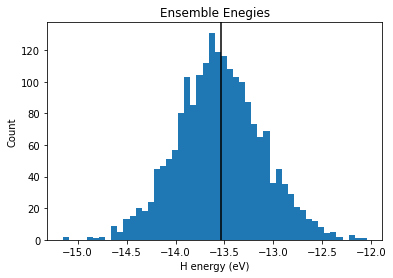

In [24]:
results = plt.hist(energies, bins=50)
plt.title('Ensemble Enegies')
plt.xlabel('H energy (eV)')
plt.ylabel('Count')
plt.axvline(H[0].calc.results['energy'], color='black')
# ax = plt.gca()
# ax.vlines(H[0].calc.results['energy'], 0, 100, color='black')

In [11]:
len(energies)
print(energies)

[-6.1440412  -5.39733924 -5.57730461 ... -5.88002216 -5.23156495
 -5.06812243]


In [12]:
H[0].calc.parameters

{}

In [25]:
from ase.dft.bee import ensemble

In [27]:
contributions = np.array([
    -0.40161206599500876,
    0.21375060129683776,   
    -2.7295278570901249E-002,
    -6.0405843446209917E-002,
     6.864675836E-02,
    -3.978046995E-02,
    6.525698694E-03,
    1.673156217E-02,
    -2.388348139E-02,
    1.520142384E-02,
    2.450998535E-03,
    -1.759854152E-02,
    2.169708039E-02,
    -1.294874136E-02,
    -3.560810652E-03,
    1.576138829E-02,
    -1.315213926E-02,
    7.188680951E-04,
    8.211081252E-03,
    -9.428599634E-03,
    4.563252102E-03,
    3.249756548E-03,
    -9.133027361E-03,
    1.029562245E-02,
    -5.836261266E-03,
    -1.962235378E-03,
    7.904236253E-03,
    -9.010967448E-03,
    4.993437698E-03,
    1.348489526E-03,
    -8.008426204E-02,
    -2.8175979881651436E-002])


In [32]:
ase_energies = ensemble(H[0].calc.results['energy'], contributions, 'BEEF-vdW')

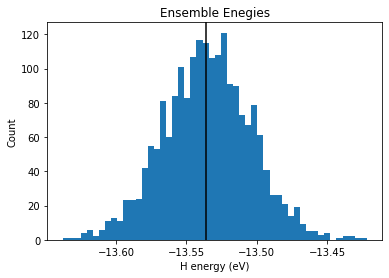

In [34]:
# I feel a lot more confident about this one:

results = plt.hist(ase_energies, bins=50)
plt.title('Ensemble Enegies')
plt.xlabel('H energy (eV)')
plt.ylabel('Count')
plt.axvline(H[0].calc.results['energy'], color='black')
# ax = plt.gca()
# ax.vlines(H[0].calc.results['energy'], 0, 100, color='black')